# Data analysis - all data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
filename = '../Preprocess/GadgetX-NewMDCLUSTER-1/combined-csv/GadgetX-NewMDCLUSTER_0001.snap_000.z16.981_combined.csv'
os.path.exists(filename)

True

In [3]:
file_names = os.listdir('../Preprocess/GadgetX-NewMDCLUSTER-1/combined-csv/')

In [4]:
dataframes = []
for file_name in file_names:
    df = pd.read_csv(f'../Preprocess/GadgetX-NewMDCLUSTER-1/combined-csv/{file_name}')
    dataframes.append(df)

In [5]:
all_data = pd.concat(dataframes)

In [6]:
all_data.head()

,ID,hostHalo,numSubStruct,Mvir,npart,Xc,Yc,Zc,VXc,VYc,...,fMhires,Ekin,Epot,SurfP,Phi0,cNFW,numProgenitors,ProgenitorsID,redshift,snapshot
0,81000000000001,0,105,9.933340e+13,162795,503449.718646,493492.809038,511552.013287,-96.43,213.56,...,0.999688,6.280990e+19,-9.040170e+19,-4.096980e+19,4071250.0,2.34438,7,"[80000000000001, 80000000004156, 8000000001895...",1.83,81
1,81000000000002,0,34,4.309300e+13,69610,497819.310267,502133.020435,502670.240503,296.00,-334.38,...,0.999760,1.855080e+19,-2.657860e+19,-6.445300e+18,3824820.0,4.14485,2,"[80000000000002, 80000000016459]",1.83,81
2,81000000000003,0,28,4.091970e+13,69538,500359.514317,503206.438832,503467.475439,-107.35,-212.51,...,0.999821,2.003550e+19,-2.267750e+19,-9.798490e+18,2969800.0,3.58897,3,"[80000000000004, 80000000021300, 80000000019917]",1.83,81
3,81000000000004,0,28,3.346460e+13,55223,502263.162043,484861.233018,506330.124744,-219.75,297.48,...,0.999644,1.116100e+19,-1.619410e+19,-6.880610e+18,2087790.0,2.33095,2,"[80000000000005, 80000000006610]",1.83,81
4,81000000000005,0,21,3.032440e+13,49957,497476.316316,499433.486199,503467.398948,168.69,220.03,...,0.999614,8.595400e+18,-1.365720e+19,-4.572200e+18,2243200.0,2.43243,3,"[80000000000006, 80000000021323, 80000000005358]",1.83,81


In [7]:
y = all_data.Mvir
X = all_data.drop(columns=['ID','hostHalo','Mvir','ProgenitorsID'])

In [8]:
col = X.columns
print(col)

Index(['numSubStruct', 'npart', 'Xc', 'Yc', 'Zc', 'VXc', 'VYc', 'VZc', 'Rvir',
       'Rmax', 'r2', 'mbp_offset', 'com_offset', 'Vmax', 'v_esc', 'sigV',
       'lambda', 'lambdaE', 'Lx', 'Ly', 'Lz', 'b', 'c', 'Eax', 'Eay', 'Eaz',
       'Ebx', 'Eby', 'Ebz', 'Ecx', 'Ecy', 'Ecz', 'ovdens', 'nbins', 'fMhires',
       'Ekin', 'Epot', 'SurfP', 'Phi0', 'cNFW', 'numProgenitors', 'redshift',
       'snapshot'],
      dtype='object')


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1904194 entries, 0 to 223
Data columns (total 43 columns):
 #   Column          Dtype  
---  ------          -----  
 0   numSubStruct    object 
 1   npart           object 
 2   Xc              float64
 3   Yc              float64
 4   Zc              float64
 5   VXc             float64
 6   VYc             float64
 7   VZc             float64
 8   Rvir            float64
 9   Rmax            float64
 10  r2              float64
 11  mbp_offset      float64
 12  com_offset      float64
 13  Vmax            float64
 14  v_esc           float64
 15  sigV            float64
 16  lambda          float64
 17  lambdaE         float64
 18  Lx              float64
 19  Ly              float64
 20  Lz              float64
 21  b               float64
 22  c               float64
 23  Eax             float64
 24  Eay             float64
 25  Eaz             float64
 26  Ebx             float64
 27  Eby             float64
 28  Ebz             

In [10]:
# Convert string objects to literals
X['numSubStruct'] = X['numSubStruct'].astype(int)
X['npart'] = X['npart'].astype(int)
X['nbins'] = X['nbins'].astype(int)
X['numProgenitors'] = X['numProgenitors'].astype(int)
X['snapshot'] = X['snapshot'].astype(int)

/home/roscopikotrain/programs/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mvir', ylabel='Density'>

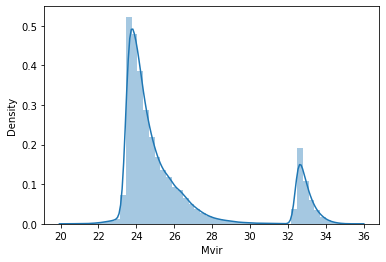

In [11]:
sns.distplot(np.log(y))

In [12]:
X.describe()

,numSubStruct,npart,Xc,Yc,Zc,VXc,VYc,VZc,Rvir,Rmax,...,nbins,fMhires,Ekin,Epot,SurfP,Phi0,cNFW,numProgenitors,redshift,snapshot
count,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,...,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06,1.904194e+06
mean,9.956654e-02,2.575870e+02,5.007742e+05,4.994971e+05,4.990204e+05,-4.204308e+01,-7.998909e+01,-1.019666e+01,2.421373e+02,1.429646e+02,...,6.807982e+00,8.036348e-01,2.057980e+19,-3.405992e+19,-8.927490e+18,4.549449e+05,1.298794e+01,7.665180e-01,1.704753e+00,8.945714e+01
std,3.135197e+00,9.580410e+03,1.084851e+05,1.083433e+05,1.084405e+05,4.565202e+02,4.255146e+02,5.185178e+02,3.869837e+02,2.897636e+02,...,3.015148e+00,3.886670e-01,1.063021e+20,1.601525e+20,4.759987e+19,1.408278e+06,9.211981e+00,4.823193e-01,1.504042e+00,2.391909e+01
min,0.000000e+00,2.000000e+01,2.979848e-02,2.989953e+00,4.348920e+00,-4.896330e+03,-5.209810e+03,-4.184990e+03,6.000000e-01,7.000000e-02,...,4.000000e+00,0.000000e+00,1.005230e+11,-1.180090e+22,-3.712470e+21,7.553020e+02,-1.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
25%,0.000000e+00,2.600000e+01,4.910617e+05,4.900139e+05,4.899209e+05,-3.325900e+02,-3.186200e+02,-3.354800e+02,6.760000e+01,1.701000e+01,...,5.000000e+00,1.000000e+00,5.103890e+13,-4.584408e+15,-6.306488e+14,1.834320e+04,6.368390e+00,1.000000e+00,4.900000e-01,7.100000e+01
50%,0.000000e+00,3.800000e+01,5.005198e+05,4.997608e+05,4.996201e+05,1.314000e+01,-5.409000e+01,1.861000e+01,8.246000e+01,2.700500e+01,...,6.000000e+00,1.000000e+00,1.667870e+14,-3.774550e+14,-4.470920e+13,3.392630e+04,1.107440e+01,1.000000e+00,1.320000e+00,9.000000e+01
75%,0.000000e+00,8.200000e+01,5.093991e+05,5.086043e+05,5.076688e+05,2.484700e+02,1.726100e+02,3.108400e+02,1.292600e+02,5.281000e+01,...,8.000000e+00,1.000000e+00,2.218470e+15,-1.281470e+14,-9.476382e+12,1.102130e+05,1.725930e+01,1.000000e+00,2.534000e+00,1.100000e+02
max,1.247000e+03,4.052949e+06,9.999996e+05,9.999951e+05,9.999995e+05,4.548820e+03,4.586000e+03,4.692120e+03,2.977050e+03,2.234890e+03,...,3.700000e+01,1.000000e+00,8.806310e+21,-2.215350e+11,-0.000000e+00,1.016320e+09,9.860950e+01,1.220000e+02,1.323300e+01,1.280000e+02


In [13]:
# Standardize data features to use zero mean normalisation

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

<AxesSubplot:>

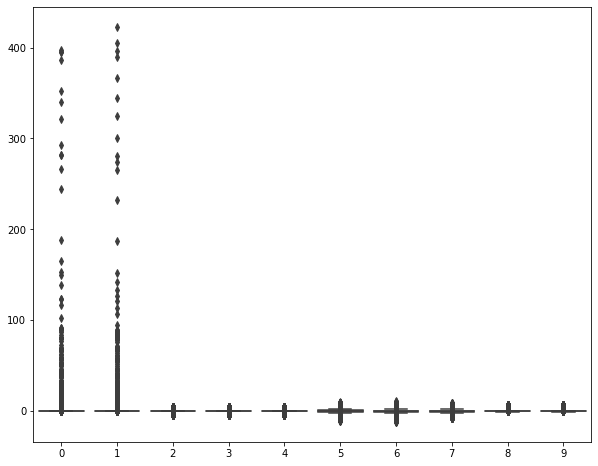

In [14]:
# Get first 10 features
fig, ax=plt.subplots(1,figsize=(10,8))
sns.boxplot(data=Xs[:,0:10], ax=ax)

<AxesSubplot:>

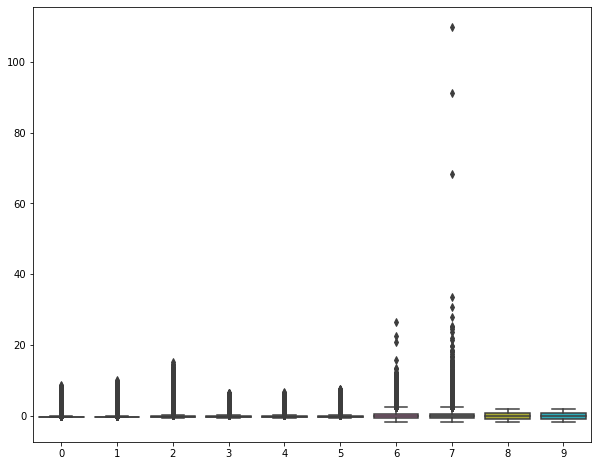

In [15]:
# Get second 10 features
fig, ax=plt.subplots(1,figsize=(10,8))
sns.boxplot(data=Xs[:,10:20], ax=ax)

<AxesSubplot:>

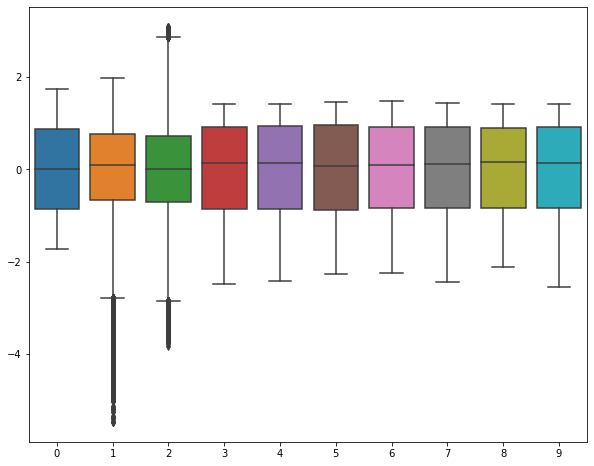

In [16]:
# Get third 10 features
fig, ax=plt.subplots(1,figsize=(10,8))
sns.boxplot(data=Xs[:,20:30], ax=ax)

<AxesSubplot:>

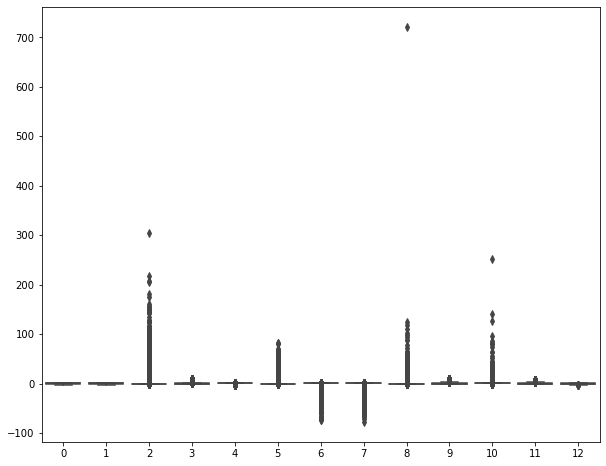

In [17]:
# Get fourth 10 features
fig, ax=plt.subplots(1,figsize=(10,8))
sns.boxplot(data=Xs[:,30:43], ax=ax)

<AxesSubplot:>

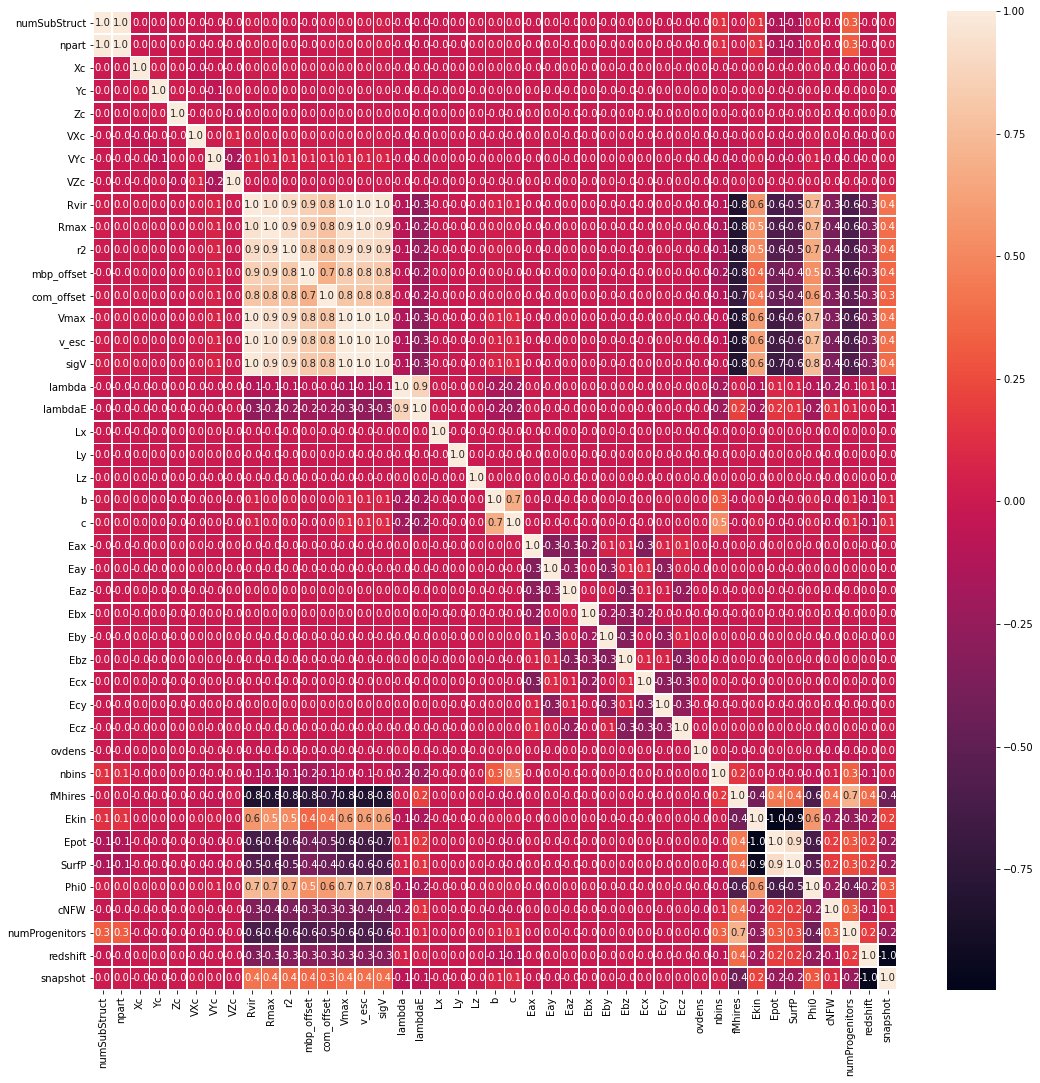

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

So from the above heatmap features ['numSubStruct', 'npart','Rvir',
       'Rmax', 'r2', 'mbp_offset', 'com_offset', 'Vmax', 'v_esc', 'sigV'] positve correlate with Mvir. 
whilst [fMhires',
       'Ekin', 'Epot', 'SurfP', 'Phi0', 'cNFW', 'numProgenitors', 'redshift'] have negative correlation and everthing else has zero correlation.

In [19]:
all_data['redshift'].describe()

count    1.904194e+06
mean     1.704753e+00
std      1.504042e+00
min      0.000000e+00
25%      4.900000e-01
50%      1.320000e+00
75%      2.534000e+00
max      1.323300e+01
Name: redshift, dtype: float64

In [20]:
all_data['redshift'].value_counts()

0.045     26606
0.000     26572
0.068     26565
0.022     26564
0.092     26535
          ...  
12.331        3
11.962        3
12.583        3
12.839        2
13.233        1
Name: redshift, Length: 121, dtype: int64

/home/roscopikotrain/programs/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='redshift', ylabel='Density'>

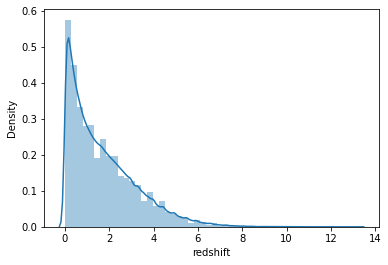

In [21]:
sns.distplot(X['redshift'])

In [22]:
data = pd.concat([y, X],axis=1)

<AxesSubplot:xlabel='redshift', ylabel='numSubStruct'>

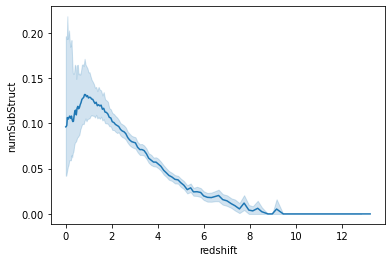

In [23]:
sns.lineplot(data=data, x= 'redshift', y= 'numSubStruct')

<AxesSubplot:xlabel='redshift', ylabel='Mvir'>

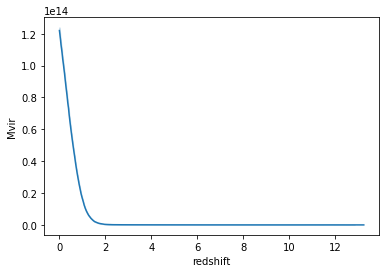

In [24]:
sns.lineplot(data=data, x= 'redshift', y= 'Mvir')

<AxesSubplot:xlabel='redshift', ylabel='Rvir'>

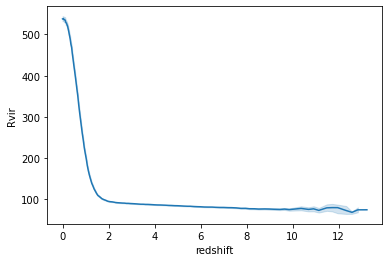

In [25]:
sns.lineplot(data=data, x= 'redshift', y= 'Rvir')

ValueError: Contour levels must be increasing

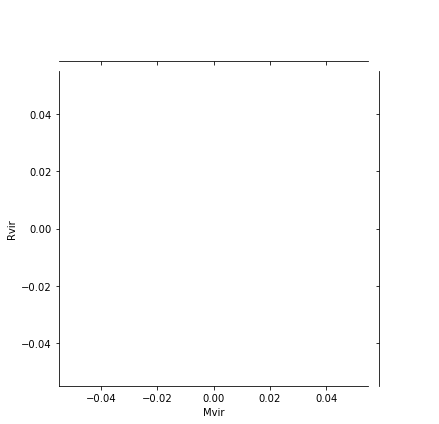

In [26]:
sns.jointplot(x=data['Mvir'],y=data['Rvir'],kind='kde')